In [1]:
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import sklearn

df = pd.read_hdf("Downloads/ATU.h5", key="SBERT&LF_MERGE")
df = df[df["motif"] != "NOT FOUND"]
num_classes = len(np.unique(df["motif"]))
X = np.array(df["LF"].tolist())
y = to_categorical(LabelEncoder().fit_transform(df["motif"]))

weights = sklearn.utils.class_weight.compute_class_weight('balanced', classes=np.unique(LabelEncoder().fit_transform(df["motif"])), y=LabelEncoder().fit_transform(df["motif"]))

class_weights = {k:v for k,v in enumerate(weights)}
class_weights
def get_model():
    clf = keras.Sequential([
        keras.layers.Dense(768, input_shape = (768,), activation = 'relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(num_classes, activation = 'softmax')
    ])
    clf.compile(
        loss = 'categorical_crossentropy',
        optimizer = "adam",
        metrics=['accuracy']
    )
    return clf
clf = KerasClassifier(
    build_fn=get_model, 
    epochs=20,
    batch_size=32
)
clf.fit(X,y,class_weight=class_weights)

<IPython.core.display.Javascript object>

Epoch 1/20
49/49 [==============================] - 0s 1ms/step - loss: 1.5274 - accuracy: 0.3900
Epoch 2/20
49/49 [==============================] - 0s 1ms/step - loss: 0.9950 - accuracy: 0.6055
Epoch 3/20
49/49 [==============================] - 0s 1ms/step - loss: 0.7852 - accuracy: 0.6812
Epoch 4/20
49/49 [==============================] - 0s 1ms/step - loss: 0.6360 - accuracy: 0.7319
Epoch 5/20
49/49 [==============================] - 0s 1ms/step - loss: 0.5567 - accuracy: 0.7652
Epoch 6/20
49/49 [==============================] - 0s 1ms/step - loss: 0.4605 - accuracy: 0.8063
Epoch 7/20
49/49 [==============================] - 0s 1ms/step - loss: 0.4008 - accuracy: 0.8069
Epoch 8/20
49/49 [==============================] - 0s 1ms/step - loss: 0.3600 - accuracy: 0.8416
Epoch 9/20
49/49 [==============================] - 0s 1ms/step - loss: 0.3157 - accuracy: 0.8538
Epoch 10/20
49/49 [==============================] - 0s 1ms/step - loss: 0.2669 - accuracy: 0.8768
Epoch 11/20
49/49 [

In [38]:
df_test = pd.read_pickle('Downloads/MFTDwithLF.pkl')
X_test = np.concatenate(df_test['longformer_output'].to_numpy())
y_test = to_categorical(LabelEncoder().fit_transform(df_test["super_category"]))


<IPython.core.display.Javascript object>

In [39]:
from sklearn.model_selection import train_test_split

X_eval, X_test, y_eval, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [71]:
df = pd.read_pickle("Downloads/ATUwithLF.pkl")
num_classes = len(np.unique(df["super_category"]))
X = np.concatenate(df['longformer_output'].to_numpy())
y = to_categorical(LabelEncoder().fit_transform(df["super_category"]))

weights = sklearn.utils.class_weight.compute_class_weight('balanced', classes=np.unique(LabelEncoder().fit_transform(df["super_category"])), y=LabelEncoder().fit_transform(df["super_category"]))

class_weights = {k:v for k,v in enumerate(weights)}
class_weights

def get_model():
    clf = keras.Sequential([
        keras.layers.Dense(1024, input_shape = (1024,), activation = 'relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(num_classes, activation = 'softmax')
    ])
    clf.compile(
        loss = 'categorical_crossentropy',
        optimizer = "adam",
        metrics=['accuracy']
    )
    print(clf.summary())
    return clf
clf = KerasClassifier(
    build_fn=get_model, 
    epochs=500,
    batch_size=32,
    verbose=1
)
history = clf.fit(X,y,class_weight=class_weights, validation_split=0.2, validation_data=(X_eval, y_eval))

<IPython.core.display.Javascript object>

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_20 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 7)                 7175      
Total params: 1,056,775
Trainable params: 1,056,775
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
39/39 [==============================] - 0s 3ms/step - loss: 1.9638 - accuracy: 0.1477 - val_loss: 5.6028 - val_accuracy: 0.0224
Epoch 2/500
39/39 [==============================] - 0s 2ms/step - loss: 1.6413 - accuracy: 0.2239 - val_loss: 3.8970 - val_accuracy: 0.0192
Epoch 3/500
39/39 [==============================] - 0s 2ms/step - loss: 1.5858 - accu

In [70]:
clf.summary()

AttributeError: 'KerasClassifier' object has no attribute 'summary'

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

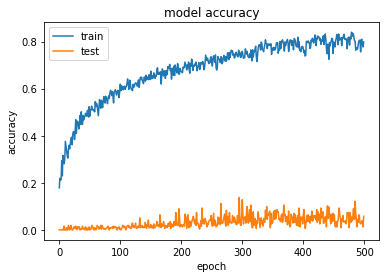

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

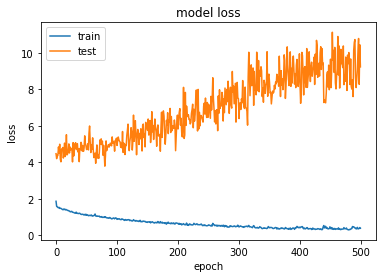

In [32]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
df = pd.read_hdf("Downloads/ATU.h5", key="SBERT&LF_MERGE")
df.head()

<IPython.core.display.Javascript object>

,atu,desc,title,origin,text,url,LF,SBERT,from_xml,language,clean-text,TFIDF,motif
0,1,The theft of fish,Reynard Steals Fish,Joseph Jacobs,"Reynard saw a man driving a cart full of fish,...",http://www.pitt.edu/~dash/type0001.html,"[-0.08893658, -0.17399412, 0.13387115, 0.16787...","[0.2095835, -0.25443116, 0.12735482, -0.024643...",False,English,reynard saw man driving cart full fish which m...,"{'ann': 0.5048304814169332, 'cart': 0.43680431...",Animal Tales
1,1,The theft of fish,Two Foxes Steal Herrings,Scotland,A man was one day walking along the road with ...,http://www.pitt.edu/~dash/type0001.html,"[-0.029333945, -0.039598964, 0.17414506, 0.030...","[0.18995391, -0.26241878, 0.110429704, -0.0013...",False,English,man wa one day walking along the road with cre...,"{'creel': 0.6915282840164243, 'herring': 0.459...",Animal Tales
2,1,The theft of fish,The Fox and the Lapp,Andrew Lang,Once upon a time a fox lay peeping out of his ...,http://www.pitt.edu/~dash/type0001.html,"[-0.038062423, 0.0030556214, 0.20822719, 0.102...","[0.20028047, -0.28412798, 0.11984266, -0.01601...",False,English,once upon time fox lay peeping out his hole wa...,"{'sledge': 0.556062721504489, 'fox': 0.3911633...",Animal Tales
3,1,The theft of fish,"Mr. Fox Goes a-Hunting, but Mr. Rabbit Bags th...",Joel Chandler Harris,One day Brer Fox came along all rigged out and...,http://www.pitt.edu/~dash/type0001.html,"[-0.088579044, 0.046329536, 0.12717168, 0.1244...","[0.18662544, -0.27005976, 0.080623224, -0.0033...",False,English,one day brer fox came along all rigged out and...,"{'brer': 0.7984325761546719, 'rabbit': 0.45902...",Animal Tales
4,1,The theft of fish,How Brother Fox Was Too Smart,Joel Chandler Harris,One day Brer Fox heard Mr. Man coming down the...,http://www.pitt.edu/~dash/type0001.html,"[-0.0047509195, 0.012085325, 0.19212513, 0.060...","[0.20279369, -0.25388458, 0.11385498, -0.01736...",False,English,one day brer fox heard man coming down the big...,"{'brer': 0.7338121861657557, 'fox': 0.49859144...",Animal Tales


In [24]:
df2 = pd.read_pickle("Downloads/ATUwithLF.pkl")
df2.head()

<IPython.core.display.Javascript object>

,atu,desc,title,origin,text,url,super_category,longformer_output,super_category_codes
0,1,The theft of fish,Reynard Steals Fish,Joseph Jacobs,"Reynard saw a man driving a cart full of fish,...",http://www.pitt.edu/~dash/type0001.html,ANIMAL TALES,"[[0.2095835, -0.2544312, 0.12735476, -0.024643...",0
1,1,The theft of fish,Two Foxes Steal Herrings,Scotland,A man was one day walking along the road with ...,http://www.pitt.edu/~dash/type0001.html,ANIMAL TALES,"[[0.18995392, -0.26241872, 0.11042976, -0.0013...",0
2,1,The theft of fish,The Fox and the Lapp,Andrew Lang,Once upon a time a fox lay peeping out of his ...,http://www.pitt.edu/~dash/type0001.html,ANIMAL TALES,"[[0.20028043, -0.28412798, 0.119842626, -0.016...",0
3,1,The theft of fish,"Mr. Fox Goes a-Hunting, but Mr. Rabbit Bags th...",Joel Chandler Harris,One day Brer Fox came along all rigged out and...,http://www.pitt.edu/~dash/type0001.html,ANIMAL TALES,"[[0.18662556, -0.27005982, 0.080623195, -0.003...",0
4,1,The theft of fish,How Brother Fox Was Too Smart,Joel Chandler Harris,One day Brer Fox heard Mr. Man coming down the...,http://www.pitt.edu/~dash/type0001.html,ANIMAL TALES,"[[0.20279367, -0.2538846, 0.11385491, -0.01736...",0


In [63]:
X.shape

(1558, 1024)

In [64]:
from sklearn.decomposition import PCA
n = 2
pca = PCA(n_components=n)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = [f"PC{i+1}" for i in range(n)])

<IPython.core.display.Javascript object>

In [78]:
pca.explained_variance_ratio_

array([0.25805157, 0.15082352], dtype=float32)

Counter({1: 552, 0: 347, 5: 290, 3: 163, 2: 93, 6: 58, 4: 55})


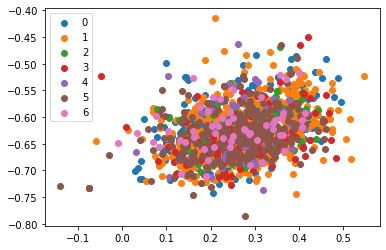

In [66]:
from collections import Counter
from matplotlib import pyplot
from numpy import where
y_pca = df['super_category_codes'].to_numpy()
counter = Counter(y_pca)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y_pca == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [67]:
from sklearn.utils import shuffle

X_svm = principalDf.to_numpy()
y_svm = y_pca

X_svm, y_svm = shuffle(X_svm, y_svm)

In [81]:
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
# define model
model = SVC(gamma='scale')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_svm, y_svm, cv=cv, n_jobs=-1)
# summarize performance
print('Mean accuracy: %.3f' % mean(scores))

Mean accuracy: 0.354


In [80]:
scores

array([0.35897436, 0.3525641 , 0.34935897, 0.36012862, 0.35691318,
       0.35897436, 0.35576923, 0.34935897, 0.34726688, 0.35691318,
       0.35576923, 0.3525641 , 0.3525641 , 0.34726688, 0.35691318])

In [50]:
make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

(array([[-1.41378978, -1.09433986],
        [-1.1785108 , -1.58251586],
        [-1.97507026, -1.85349255],
        ...,
        [-0.60110683, -0.24307109],
        [-1.07464132, -1.01954006],
        [-0.50662359, -0.17107237]]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [61]:
X_svm

array([[ 0.9579721 , -0.24511777],
       [-0.08712136,  0.05244913],
       [-0.2168458 , -1.0269297 ],
       ...,
       [ 0.12453303, -0.868873  ],
       [ 0.5918578 , -0.4913019 ],
       [ 0.13953044,  1.3142718 ]], dtype=float32)

In [52]:
principalDf.to_numpy()

array([[ 1.2251217 ,  0.5386245 ],
       [ 0.04441056,  0.81369877],
       [ 0.45941958,  1.4633838 ],
       ...,
       [ 1.2054616 , -0.33965504],
       [ 2.5005095 , -0.02422651],
       [ 0.52272284, -0.34261113]], dtype=float32)